In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('D:/salary_prediction_data.csv')

# Encode categorical columns
for col in ['Education', 'Location', 'Job_Title', 'Gender']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
pred_gb = gb.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, pred_gb))

# Voting Regressor
voting = VotingRegressor([('lr', lr), ('rf', rf), ('gb', gb)]).fit(X_train, y_train)
pred_voting = voting.predict(X_test)
rmse_voting = np.sqrt(mean_squared_error(y_test, pred_voting))

print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Gradient Boosting RMSE: {rmse_gb}')
print(f'Voting Regressor RMSE: {rmse_voting}')

Linear Regression RMSE: 18813.88840081037
Random Forest RMSE: 11272.808268108052
Gradient Boosting RMSE: 10422.5223412265
Voting Regressor RMSE: 11665.36954939395


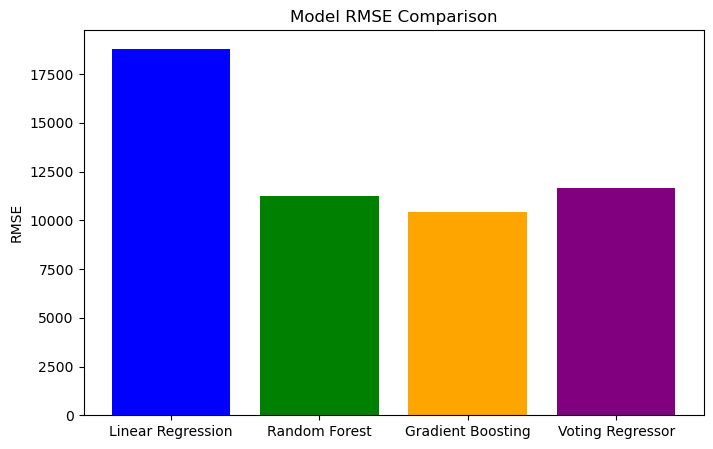

In [4]:
import matplotlib.pyplot as plt

# RMSE values (replace these with your actual variable names, if needed)
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Voting Regressor']
rmse_values = [rmse_lr, rmse_rf, rmse_gb, rmse_voting]

plt.figure(figsize=(8, 5))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'orange', 'purple'])
plt.ylabel('RMSE')
plt.title('Model RMSE Comparison')
plt.show()

In [5]:
df = pd.read_csv('D:/salary_prediction_data.csv')
df.head()  # this shows first 5 rows

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [6]:
X=df[['Experience']]
y=df['Salary']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 675798552.708249
R2 Score: 0.17234957250841176


In [11]:
import pandas as pd

# Ensure the column name matches your training data
new_experience = pd.DataFrame({'Experience': [10]})

# Predict using the model
predicted_salary = model.predict(new_experience)
print(predicted_salary)

[100274.12770538]


In [12]:
print("Predicted Salary:", predicted_salary[0])


Predicted Salary: 100274.1277053846


In [13]:
import numpy as np
mean_value=np.mean([100000,2000000,3000000])
print (mean_value)

1700000.0


In [14]:
import joblib
joblib.dump(model,'salary_model.pkl')

['salary_model.pkl']

In [15]:
!streamlit .run SalaryPrediction.py

Usage: streamlit [OPTIONS] COMMAND [ARGS]...

  Try out a demo with:

      $ streamlit hello

  Or use the line below to run your own script:

      $ streamlit run your_script.py

Options:
  --log_level [error|warning|info|debug]
  --version                       Show the version and exit.
  --help                          Show this message and exit.

Commands:
  activate  Activate Streamlit by entering your email.
  cache     Manage the Streamlit cache.
  config    Manage Streamlit's config settings.
  docs      Show help in browser.
  hello     Runs the Hello World script.
  help      Print this help message.
  init      Initialize a new Streamlit project.
  run       Run a Python script, piping stderr to Streamlit.
  version   Print Streamlit's version number.


In [3]:
pip install pandas scikit-learn streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
df=pd.read_csv('D:/salary_prediction_data.csv')
print(df.head())

     Education  Experience  Location Job_Title  Age  Gender         Salary
0  High School           8     Urban   Manager   63    Male   84620.053665
1          PhD          11  Suburban  Director   59    Male  142591.255894
2     Bachelor          28  Suburban   Manager   61  Female   97800.255404
3  High School          29     Rural  Director   45    Male   96834.671282
4          PhD          25     Urban   Analyst   26  Female  132157.786175


In [19]:
import pickle
with open('salary_model.pkl','wb')as f:
    pickle.dump(model,f)

In [20]:
import os 
print(os.getcwd())

C:\Users\sanja\anaconda\Untitled Folder


In [2]:
import pandas as pd

# 1. Load your data
df = pd.read_csv('D:/salary_prediction_data.csv')

# 2. Choose your features and encode categoricals
X = pd.get_dummies(df[['Experience', 'Age', 'Location', 'Job_Title']], drop_first=True)
y = df['Salary']

# 3. Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Save the model and the columns
import pickle
with open('salary_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)